### **Titanic Survival Prediction**
**By: Heroshi Joe Abejuela**
(Codsoft Data Science Intern)

#### **Introduction**
The Titanic survival prediction project is a classic machine learning exercise aimed at predicting the likelihood of a passenger surviving the Titanic disaster based on various features such as age, gender, ticket class, and more. This project leverages data analysis and modeling techniques to build predictive models and evaluate their performance.

#### **Problem**
The primary problem addressed in this project is to determine which passengers survived the sinking of the Titanic. Given the historical significance of the event and the availability of detailed passenger data, this serves as an excellent case study for applying data science and machine learning methodologies.

#### **Solution**
To solve this problem, I employed several machine learning models, including Logistic Regression, Random Forest, and Gradient Boosting. The process involved the following steps:
1. **Data Preprocessing**: Cleaning the dataset, handling missing values, and encoding categorical variables.
2. **Exploratory Data Analysis (EDA)**: Visualizing distributions of key features, identifying patterns, and understanding relationships within the data.
3. **Model Training**: Training multiple models on the training dataset and evaluating their performance using metrics such as accuracy, F1 score, and Kappa score.
4. **Model Evaluation**: Comparing model performance to identify the best-performing model based on the established metrics.

#### **Results**
The following table summarizes the performance of the top models trained on the dataset:

| Rank | Model               | Accuracy   | F1 Score   | Kappa Score |
|------|---------------------|------------|------------|-------------|
| 1    | Random Forest       | 0.826816   | 0.789116   | 0.642208    |
| 2    | Logistic Regression  | 0.804469   | 0.755245   | 0.592785    |
| 3    | Gradient Boosting    | 0.804469   | 0.748201   | 0.589476    |

These results indicate that the Random Forest model outperformed the others, achieving the highest accuracy and F1 score, making it the most reliable choice for predicting survival on the Titanic.

In [ ]:
#Before anything else let us import our tools or libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Download Data Set
!kaggle datasets download -d yasserh/titanic-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
titanic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Unzip Data Set
!unzip titanic-dataset.zip

Archive:  titanic-dataset.zip
replace Titanic-Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#Load Data Set using pandas
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


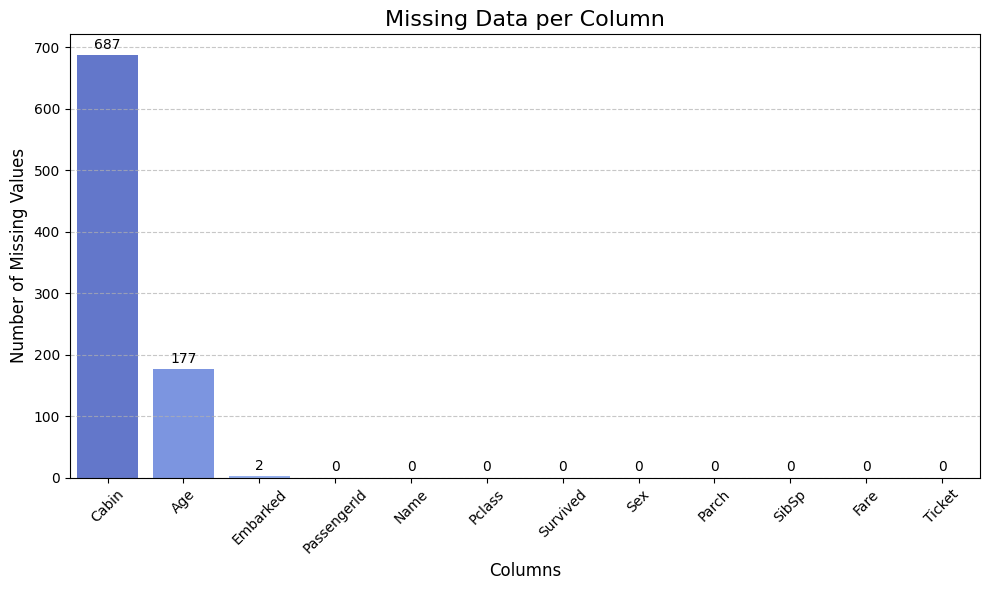

In [ ]:
# Calculate missing values
missing_data = df.isnull().sum().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(10,6))  # Set figure size
sns.barplot(x=missing_data.index, y=missing_data.values, palette="coolwarm")

# Add title and labels
plt.title("Missing Data per Column", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Missing Values", fontsize=12)

# Rotate the x labels for better visibility
plt.xticks(rotation=45)

# Add gridlines for readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with the count of missing values
for i, value in enumerate(missing_data.values):
    plt.text(i, value + 10, str(value), ha='center', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()

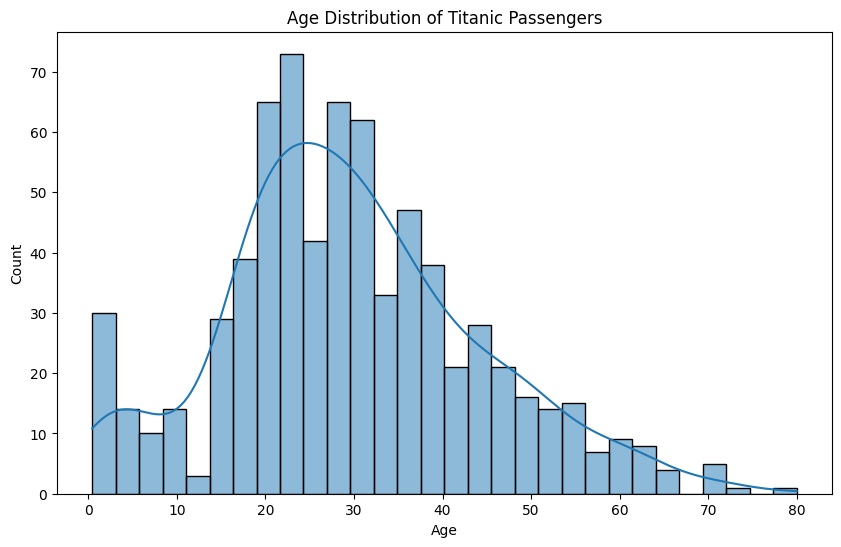

In [ ]:
# Histogram for Age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

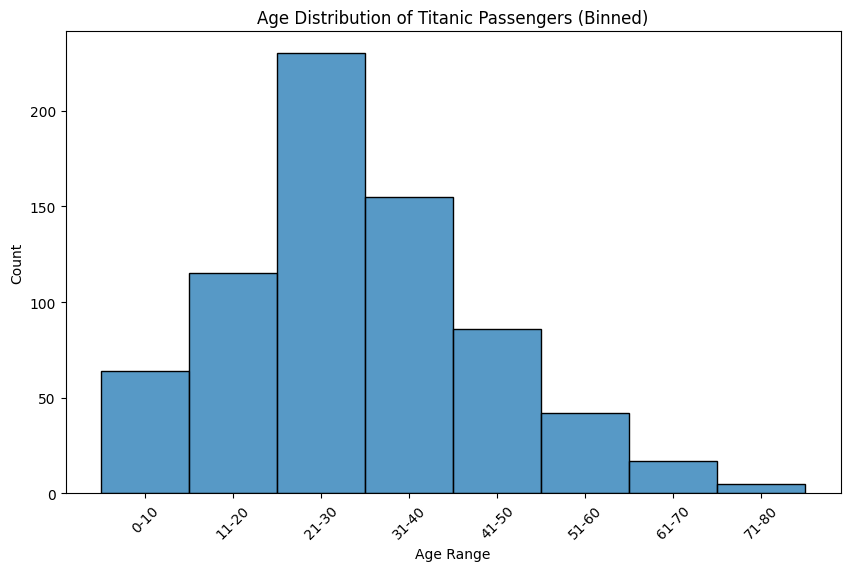

In [ ]:
# Define age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create a new column with binned age ranges
df['Age_binned'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Plotting the histogram with bin ranges
plt.figure(figsize=(10,6))
sns.histplot(df['Age_binned'], kde=False, discrete=True)

# Adding title and labels
plt.title('Age Distribution of Titanic Passengers (Binned)')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

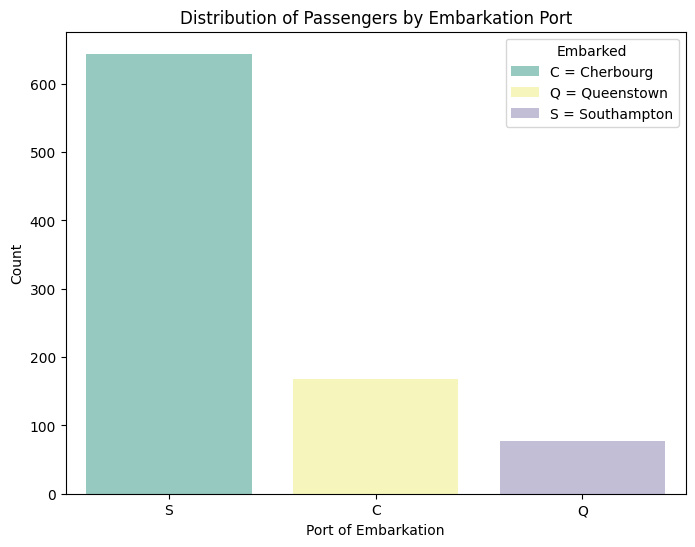

In [ ]:
# Bar plot for Embarked column with legend
plt.figure(figsize=(8,6))
sns.countplot(x='Embarked', data=df, palette='Set3')

# Adding a custom legend for the Embarked column
plt.legend(['C = Cherbourg', 'Q = Queenstown', 'S = Southampton'], title='Embarked', loc='upper right')

# Title and labels
plt.title('Distribution of Passengers by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

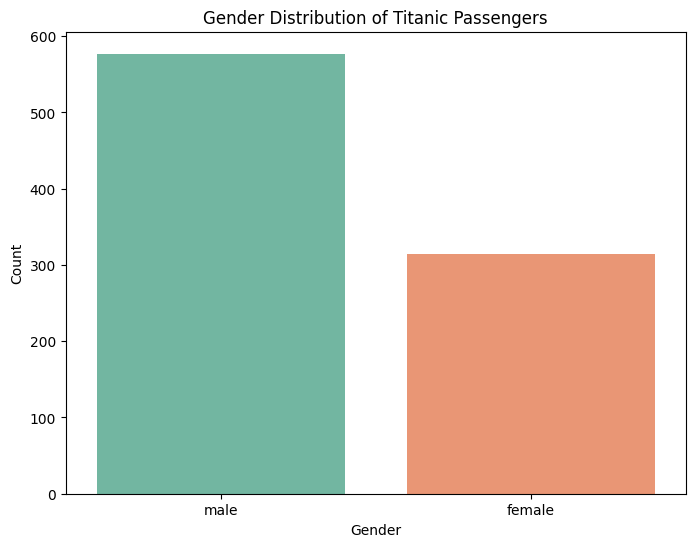

In [ ]:
# Bar plot for gender distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Gender Distribution of Titanic Passengers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

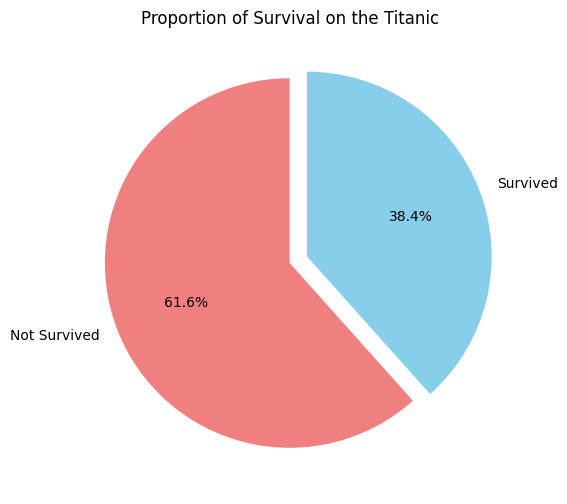

In [ ]:
# Pie chart for survival proportion
plt.figure(figsize=(8,6))
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not Survived', 'Survived'], colors=['lightcoral', 'skyblue'], startangle=90, explode=[0, 0.1])
plt.title('Proportion of Survival on the Titanic')
plt.ylabel('')
plt.show()

In [ ]:
# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Metrics for Logistic Regression
log_accuracy = accuracy_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)
log_kappa = cohen_kappa_score(y_test, y_pred_log)

In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Metrics for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_kappa = cohen_kappa_score(y_test, y_pred_rf)

In [ ]:
# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Metrics for Gradient Boosting
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_kappa = cohen_kappa_score(y_test, y_pred_gb)

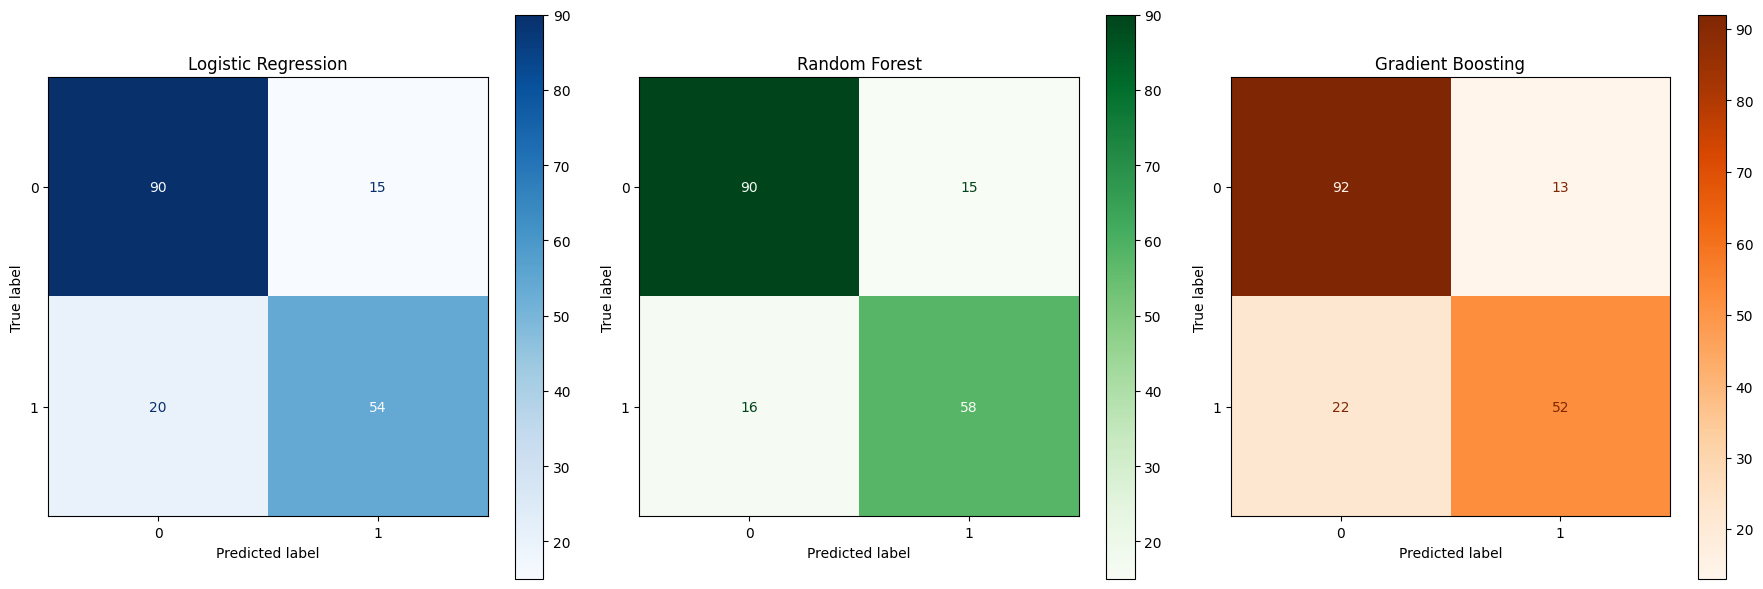

In [ ]:
# Confusion matrices for all models
fig, ax = plt.subplots(1, 3, figsize=(18,6))

# Logistic Regression
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, ax=ax[0], cmap='Blues', values_format='d')
ax[0].set_title('Logistic Regression')

# Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, ax=ax[1], cmap='Greens', values_format='d')
ax[1].set_title('Random Forest')

# Gradient Boosting
ConfusionMatrixDisplay.from_estimator(gb_model, X_test, y_test, ax=ax[2], cmap='Oranges', values_format='d')
ax[2].set_title('Gradient Boosting')

plt.tight_layout()
plt.show()

In [ ]:
# Create a DataFrame to store metrics for each model
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [log_accuracy, rf_accuracy, gb_accuracy],
    'F1 Score': [log_f1, rf_f1, gb_f1],
    'Kappa Score': [log_kappa, rf_kappa, gb_kappa]
})

# Rank models by F1 Score (higher is better, so rank from highest to lowest)
results_df['Rank'] = results_df['F1 Score'].rank(ascending=False, method='dense').astype(int)

# Sort by rank to display the best models first
results_df = results_df.sort_values('Rank')

# Display the results
results_df

,Model,Accuracy,F1 Score,Kappa Score,Rank
1,Random Forest,0.826816,0.789116,0.642208,1
0,Logistic Regression,0.804469,0.755245,0.592785,2
2,Gradient Boosting,0.804469,0.748201,0.589476,3


### **More Projects and Contact Information**

For more details on my projects and work, please visit my [GitHub profile](https://github.com/HiroshiJoe). You can also connect with me on [LinkedIn](https://www.linkedin.com/in/heroshi-joe-abejuela-513413314/) for professional updates and networking.

Feel free to reach out if you have any questions or would like to discuss potential collaborations!